In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
#Importing Necessary Libraries
import os
from glob import glob
from matplotlib import pyplot as plt 
from keras.preprocessing.image import load_img, img_to_array 
import numpy as np
from tqdm import tqdm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose, add
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import keras.backend as K

In [3]:
#Change to Project Directory
os.chdir('/content/gdrive/MyDrive/Projects/SemanticSegmentation')
print('Current Working Directory: ' + os.getcwd())

Current Working Directory: /content/gdrive/MyDrive/Projects/SemanticSegmentation


In [ ]:
#Unzip the dataset
!unzip archive.zip

Archive:  archive.zip
replace label_class_dict.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
#Load the dataset
train_image_paths = glob('png/train/*.png')
train_label_paths = glob('png/train_labels/*.png')
val_image_paths = glob('png/val/*.png')
val_label_paths = glob('png/val_labels/*.png')
test_image_paths = glob('png/test/*.png')
test_label_paths = glob('png/test_labels/*.png')
print('Count of training images: ' + str(len(train_image_paths)))
print('Count of validation images: ' + str(len(val_image_paths)))
print('Count of test images: ' + str(len(test_image_paths)))

Count of training images: 137
Count of validation images: 4
Count of test images: 10


In [5]:
#Sort training validation and test sets so that the input images and ground truths are in the same order
train_image_paths.sort()
train_label_paths.sort()
val_image_paths.sort()
val_label_paths.sort()
test_image_paths.sort()
test_label_paths.sort()
print(train_image_paths[:3])
print(train_label_paths[:3])
print('\n')
print(val_image_paths[:3])
print(val_label_paths[:3])
print('\n')
print(test_image_paths[:3])
print(test_label_paths[:3])
print('\n')

['png/train/22678915_15.png', 'png/train/22678930_15.png', 'png/train/22678945_15.png']
['png/train_labels/22678915_15.png', 'png/train_labels/22678930_15.png', 'png/train_labels/22678945_15.png']


['png/val/22978945_15.png', 'png/val/23429155_15.png', 'png/val/23579050_15.png']
['png/val_labels/22978945_15.png', 'png/val_labels/23429155_15.png', 'png/val_labels/23579050_15.png']


['png/test/22828930_15.png', 'png/test/22828990_15.png', 'png/test/22829050_15.png']
['png/test_labels/22828930_15.png', 'png/test_labels/22828990_15.png', 'png/test_labels/22829050_15.png']




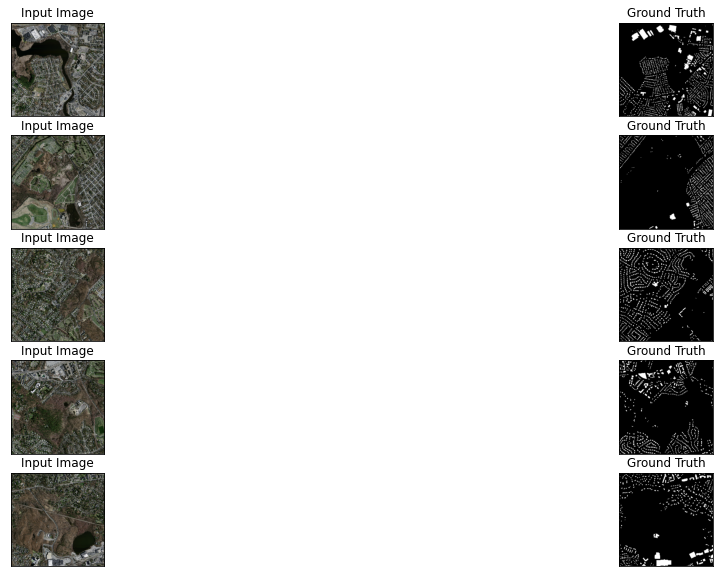

In [6]:
#Visualize images from the training dataset
plt.figure(figsize = (20, 10))
for count in range(5):
  plt.subplot(5, 2, (count + 1) * 2 - 1)
  input_image = load_img(train_image_paths[count], target_size = (512, 512))
  plt.imshow(input_image)
  plt.xticks([])
  plt.yticks([])
  plt.title('Input Image')
  plt.subplot(5, 2, (count + 1) * 2)
  ground_truth = load_img(train_label_paths[count], target_size = (512, 512))
  plt.imshow(ground_truth)
  plt.xticks([])
  plt.yticks([])
  plt.title('Ground Truth')
plt.show()

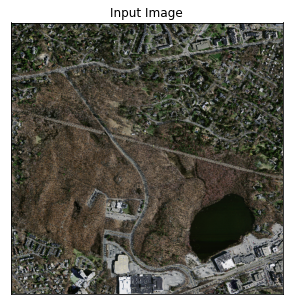

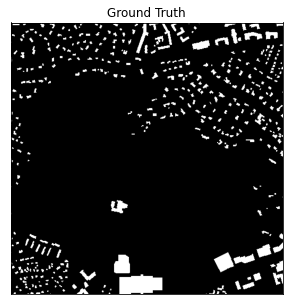

In [7]:
#Visualize a single image with more clarity

plt.figure(figsize = (5, 5))
input_image = load_img(train_image_paths[count], target_size = (512, 512))
plt.imshow(input_image) 
plt.xticks([])
plt.yticks([])
plt.title('Input Image')
plt.show()

plt.figure(figsize = (5, 5))
input_image = load_img(train_label_paths[count], target_size = (512, 512))
plt.imshow(input_image) 
plt.xticks([])
plt.yticks([])
plt.title('Ground Truth')
plt.show()

In [8]:
#Creating the training, validation and test sets

X_train, y_train = ([], [])
for curr_path in tqdm(train_image_paths):
  curr_image = load_img(curr_path, target_size = (512, 512)) 
  curr_image = img_to_array(curr_image)
  X_train.append(curr_image)
X_train = np.array(X_train, dtype = 'float')/255
print('\nShape of Training Set')
print(X_train.shape)
print('\n')
for curr_path in tqdm(train_label_paths):
  curr_image = load_img(curr_path, target_size = (512, 512), color_mode = 'grayscale') 
  curr_image = img_to_array(curr_image)
  y_train.append(curr_image)
y_train = np.array(y_train, dtype = np.uint8)/255
print('\nShape of Training Labels')
print(y_train.shape)
print('\n')

X_val, y_val = ([], [])
for curr_path in tqdm(val_image_paths):
  curr_image = load_img(curr_path, target_size = (512, 512)) 
  curr_image = img_to_array(curr_image)
  X_val.append(curr_image)
X_val = np.array(X_val, dtype = 'float')/255
print('\nShape of Validation Set')
print(X_val.shape)
print('\n')
for curr_path in tqdm(val_label_paths):
  curr_image = load_img(curr_path, target_size = (512, 512), color_mode = 'grayscale') 
  curr_image = img_to_array(curr_image)
  y_val.append(curr_image)
y_val = np.array(y_val, dtype = np.uint8)/255
print('\nShape of Validation Labels')
print(y_val.shape)
print('\n')

X_test, y_test = ([], [])
for curr_path in tqdm(test_image_paths):
  curr_image = load_img(curr_path, target_size = (512, 512)) 
  curr_image = img_to_array(curr_image)
  X_test.append(curr_image)
X_test = np.array(X_test, dtype = 'float')/255
print('\nShape of Test Set')
print(X_test.shape)
print('\n')
for curr_path in tqdm(test_label_paths):
  curr_image = load_img(curr_path, target_size = (512, 512), color_mode = 'grayscale') 
  curr_image = img_to_array(curr_image)
  y_test.append(curr_image)
y_test = np.array(y_test, dtype = np.uint8)/255
print('\nShape of Test Labels')
print(y_test.shape)
print('\n')

100%|██████████| 137/137 [00:08<00:00, 15.23it/s]



Shape of Training Set
(137, 512, 512, 3)




100%|██████████| 137/137 [00:24<00:00,  5.56it/s]



Shape of Training Labels
(137, 512, 512, 1)




100%|██████████| 4/4 [00:02<00:00,  1.85it/s]



Shape of Validation Set
(4, 512, 512, 3)




100%|██████████| 4/4 [00:00<00:00,  5.12it/s]



Shape of Validation Labels
(4, 512, 512, 1)




100%|██████████| 10/10 [00:05<00:00,  2.00it/s]



Shape of Test Set
(10, 512, 512, 3)




100%|██████████| 10/10 [00:01<00:00,  5.25it/s]


Shape of Test Labels
(10, 512, 512, 1)




In [ ]:
#Construct model for FCN-32s

input_layer = Input(shape = (512, 512, 3))
conv_layer_1a = Conv2D(kernel_size = (3, 3), filters = 64, padding = 'same', activation = 'relu')(input_layer)
conv_layer_1b = Conv2D(kernel_size = (3, 3), filters = 64, padding = 'same', activation = 'relu')(conv_layer_1a)

pool_layer_1 = MaxPooling2D(pool_size = (2, 2))(conv_layer_1b)
conv_layer_2a = Conv2D(kernel_size = (3, 3), filters = 128, padding = 'same', activation = 'relu')(pool_layer_1)
conv_layer_2b = Conv2D(kernel_size = (3, 3), filters = 128, padding = 'same', activation = 'relu')(conv_layer_2a)

pool_layer_2 = MaxPooling2D(pool_size = (2, 2))(conv_layer_2b)
conv_layer_3a = Conv2D(kernel_size = (3, 3), filters = 256, padding = 'same', activation = 'relu')(pool_layer_2)
conv_layer_3b = Conv2D(kernel_size = (3, 3), filters = 256, padding = 'same', activation = 'relu')(conv_layer_3a)
conv_layer_3c = Conv2D(kernel_size = (3, 3), filters = 256, padding = 'same', activation = 'relu')(conv_layer_3b)

pool_layer_3 = MaxPooling2D(pool_size = (2, 2))(conv_layer_3c)
conv_layer_4a = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(pool_layer_3)
conv_layer_4b = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(conv_layer_4a)
conv_layer_4c = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(conv_layer_4b)

pool_layer_4 = MaxPooling2D(pool_size = (2, 2))(conv_layer_4c)
conv_layer_5a = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(pool_layer_4)
conv_layer_5b = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(conv_layer_5a)
conv_layer_5c = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(conv_layer_5b)

pool_layer_5 = MaxPooling2D(pool_size = (2, 2))(conv_layer_5c)
fc_layer_1a = Conv2D(kernel_size = (1, 1), filters = 4096, activation = 'relu')(pool_layer_5)
fc_layer_1b = Conv2D(kernel_size = (1, 1), filters = 4096, activation = 'relu')(fc_layer_1a)

fc_layer_2 = Conv2D(kernel_size = (1, 1), filters = 1, activation = 'relu')(fc_layer_1b)

output_layer = Conv2DTranspose(kernel_size = (32, 32), filters = 1, strides = (32, 32), padding = 'same', activation = 'sigmoid')(fc_layer_2)

fcn_32_model = Model(inputs = input_layer, outputs = output_layer)
fcn_32_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
fcn_32_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 128)     147584    
                                                             

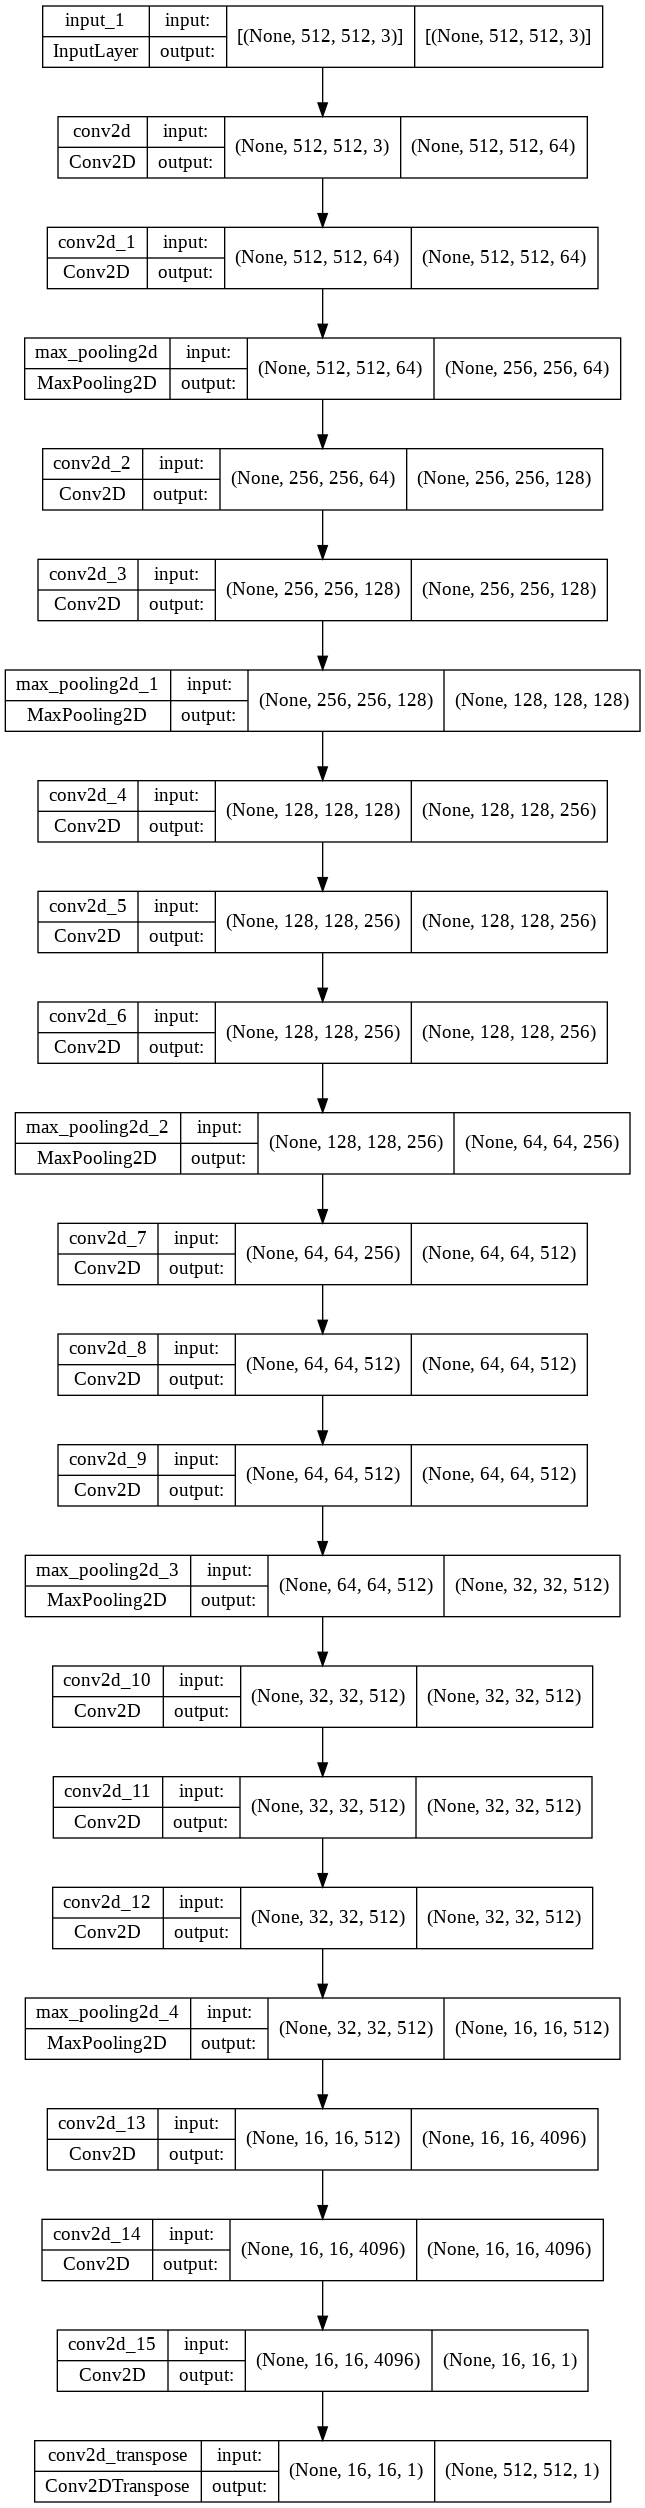

In [ ]:
#Visualize the created model
plot_model(fcn_32_model, show_shapes = True, to_file = 'FCN32s_Model.png')

In [ ]:
#Train the created model on the training data
callback = EarlyStopping(monitor = 'loss', patience = 3, restore_best_weights = True)
fcn_32_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 1, batch_size = 4, callbacks = [callback])

35/35 [==============================] - 1371s 39s/step - loss: 0.6871 - accuracy: 0.8576 - val_loss: 0.6797 - val_accuracy: 0.8911


In [ ]:
#Save the trained model for later reuse
fcn_32_model.save('FCN_32s_weights.h5py')

In [ ]:
#Evaluate the performance of the model on the test data
fcn_32_model.evaluate(X_test, y_test)

1/1 [==============================] - 29s 29s/step - loss: 0.6824 - accuracy: 0.8140


[0.6823723912239075, 0.8140155673027039]

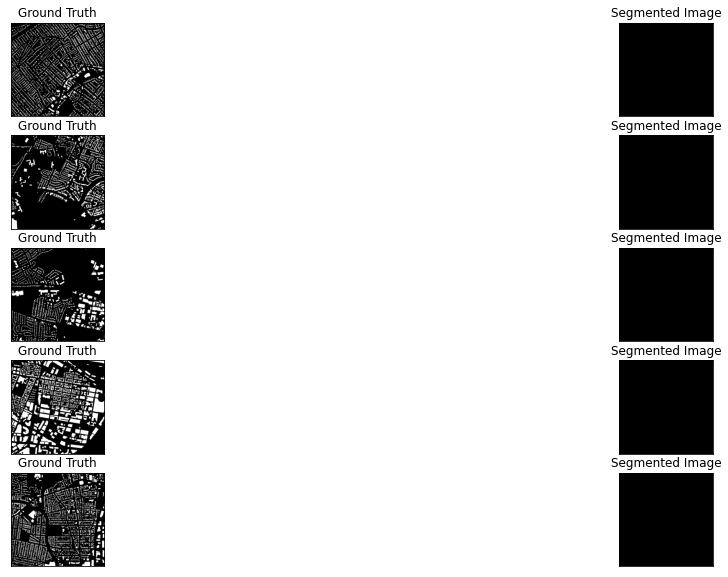

In [ ]:
#Visualize the performance of the model by plotting the predictions
plt.figure(figsize = (20, 10))
test_output = []
for count in range(5):
  curr_input = X_test[count]
  curr_input = np.expand_dims(curr_input, axis = 0)
  curr_prediction = fcn_32_model.predict(curr_input)
  plt.subplot(5, 2, (count * 2) + 1)
  ground_truth = y_test[count] 
  ground_truth = np.reshape(ground_truth, (512, 512))
  plt.imshow(ground_truth, cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.title('Ground Truth')
  plt.subplot(5, 2, count * 2 + 2)
  curr_prediction = np.reshape(curr_prediction, (512, 512))
  curr_prediction = np.where(curr_prediction >= 0.5, 1, 0)
  if (count == 4):
    test_output = curr_prediction
  plt.imshow(curr_prediction, cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.title('Segmented Image')
plt.show()

In [ ]:
#Check how the output looks mathematically
print(test_output)
print(np.sum(test_output))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0


In [ ]:
#Checking if the classes are imbalanced
foreground_pixel_count_train = np.sum(y_train)
total_pixel_count_train = np.product(y_train.shape)
background_pixel_count_train = total_pixel_count_train - foreground_pixel_count_train
print('Percentage of Foreground Pixels = ' + str(foreground_pixel_count_train/total_pixel_count_train * 100) + '\n')
print('Percentage of Background Pixels = ' + str(background_pixel_count_train/total_pixel_count_train * 100) + '\n')

Percentage of Foreground Pixels = 13.19476218119155

Percentage of Background Pixels = 86.80523781880845



In [ ]:
#Defining a custom loss function to handle imbalanced classes
def balanced_cross_entropy(y_true, y_pred):
  smooth = 1e-10
  class_1_weight = 0.86
  class_0_weight = 0.13
  loss_per_sample = -1 * (86.81 * y_true * K.log(y_pred + smooth) + 13.19 * (1 - y_true) * K.log(1 - y_pred + smooth))
  mean_loss = K.mean(loss_per_sample, axis = (1, 2, 3))
  return mean_loss

In [ ]:
#Reconstruct model swith custom loss function

input_layer = Input(shape = (512, 512, 3))
conv_layer_1a = Conv2D(kernel_size = (3, 3), filters = 64, padding = 'same', activation = 'relu')(input_layer)
conv_layer_1b = Conv2D(kernel_size = (3, 3), filters = 64, padding = 'same', activation = 'relu')(conv_layer_1a)

pool_layer_1 = MaxPooling2D(pool_size = (2, 2))(conv_layer_1b)
conv_layer_2a = Conv2D(kernel_size = (3, 3), filters = 128, padding = 'same', activation = 'relu')(pool_layer_1)
conv_layer_2b = Conv2D(kernel_size = (3, 3), filters = 128, padding = 'same', activation = 'relu')(conv_layer_2a)

pool_layer_2 = MaxPooling2D(pool_size = (2, 2))(conv_layer_2b)
conv_layer_3a = Conv2D(kernel_size = (3, 3), filters = 256, padding = 'same', activation = 'relu')(pool_layer_2)
conv_layer_3b = Conv2D(kernel_size = (3, 3), filters = 256, padding = 'same', activation = 'relu')(conv_layer_3a)
conv_layer_3c = Conv2D(kernel_size = (3, 3), filters = 256, padding = 'same', activation = 'relu')(conv_layer_3b)

pool_layer_3 = MaxPooling2D(pool_size = (2, 2))(conv_layer_3c)
conv_layer_4a = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(pool_layer_3)
conv_layer_4b = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(conv_layer_4a)
conv_layer_4c = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(conv_layer_4b)

pool_layer_4 = MaxPooling2D(pool_size = (2, 2))(conv_layer_4c)
conv_layer_5a = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(pool_layer_4)
conv_layer_5b = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(conv_layer_5a)
conv_layer_5c = Conv2D(kernel_size = (3, 3), filters = 512, padding = 'same', activation = 'relu')(conv_layer_5b)

pool_layer_5 = MaxPooling2D(pool_size = (2, 2))(conv_layer_5c)
fc_layer_1a = Conv2D(kernel_size = (1, 1), filters = 4096, activation = 'relu')(pool_layer_5)
fc_layer_1b = Conv2D(kernel_size = (1, 1), filters = 4096, activation = 'relu')(fc_layer_1a)

fc_layer_2 = Conv2D(kernel_size = (1, 1), filters = 1, activation = 'relu')(fc_layer_1b)

output_layer = Conv2DTranspose(kernel_size = (32, 32), filters = 1, strides = (32, 32), padding = 'same', activation = 'sigmoid')(fc_layer_2)

fcn_32_model_custom_loss = Model(inputs = input_layer, outputs = output_layer)
fcn_32_model_custom_loss.compile(optimizer = 'Adam', loss = balanced_cross_entropy)
fcn_32_model_custom_loss.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 512, 512, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 512, 512, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 256, 256, 64)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 256, 256, 128)     73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 256, 256, 128)     147584    
                                                           

In [ ]:
#Train the created model on the training data
#callback = EarlyStopping(monitor = 'loss', patience = 3, restore_best_weights = True)
fcn_32_model_custom_loss.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 2, batch_size = 4)

Epoch 1/2
35/35 [==============================] - 967s 28s/step - loss: 15.8764 - val_loss: 14.6953
Epoch 2/2
35/35 [==============================] - 966s 28s/step - loss: 15.8771 - val_loss: 14.6924


In [ ]:
#Save the trained model for later reuse
fcn_32_model_custom_loss.save('FCN_32s_custom_loss_weights')

In [ ]:
#Evaluate the performance of the model on the test data
fcn_32_model_custom_loss.evaluate(X_test, y_test)

1/1 [==============================] - 20s 20s/step - loss: 18.6457


18.645692825317383

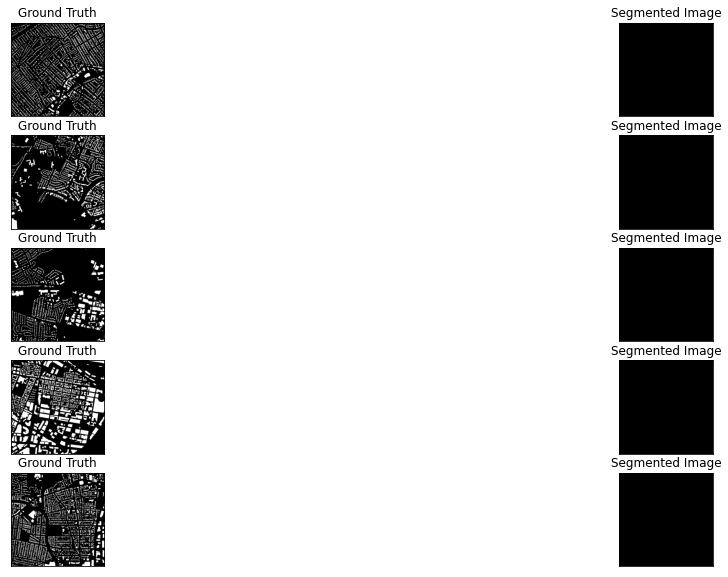

In [ ]:
#Visualize the performance of the model by plotting the predictions
plt.figure(figsize = (20, 10))
test_output = []
for count in range(5):
  curr_input = X_test[count]
  curr_input = np.expand_dims(curr_input, axis = 0)
  curr_prediction = fcn_32_model_custom_loss.predict(curr_input)
  plt.subplot(5, 2, (count * 2) + 1)
  ground_truth = y_test[count] 
  ground_truth = np.reshape(ground_truth, (512, 512))
  plt.imshow(ground_truth, cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.title('Ground Truth')
  plt.subplot(5, 2, count * 2 + 2)
  curr_prediction = np.reshape(curr_prediction, (512, 512))
  curr_prediction = np.where(curr_prediction >= 0.5, 1., 0.)
  plt.imshow(curr_prediction, cmap = 'gray', vmin = 0, vmax = 1)
  plt.xticks([])
  plt.yticks([])
  plt.title('Segmented Image')
  if (count == 4):
    test_output = curr_prediction
plt.show()

In [ ]:
print(test_output)
print(np.reshape(y_test[0], (512, 512)))
print(np.sum(test_output))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0


In [10]:
def dice_loss(y_true, y_pred):
  smooth = 1
  intersection = K.sum(y_true * y_pred)
  dice_coefficient = (2.0 * intersection + smooth)/(K.sum(y_true) + K.sum(y_pred) + smooth)
  return 1 - dice_coefficient 

In [ ]:
#Construct the model for FCN-8s

input_layer = Input(shape = (512, 512, 3))
conv_layer_1a = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu')(input_layer)
conv_layer_1b = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_1a)

pool_layer_2 = MaxPooling2D(pool_size = (2, 2))(conv_layer_1b)
conv_layer_2a = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(pool_layer_2)
conv_layer_2b = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_2a)

pool_layer_3 = MaxPooling2D(pool_size = (2, 2))(conv_layer_2b)
conv_layer_3a = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(pool_layer_3)
conv_layer_3b = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_3a)
conv_layer_3c = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_3b)

pool_layer_4 = MaxPooling2D(pool_size = (2, 2))(conv_layer_3c)
conv_layer_4a = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')(pool_layer_4)
conv_layer_4b = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_4a)
conv_layer_4c= Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_4b)

pool_layer_5 = MaxPooling2D(pool_size = (2, 2))(conv_layer_4c)
conv_layer_5a = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu')(pool_layer_5)
conv_layer_5b = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_5a)
conv_layer_5c = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_5b)

pool_layer_6 = MaxPooling2D(pool_size = (2, 2))(conv_layer_5c)
conv_layer_6a = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu')(pool_layer_6)
conv_layer_6b = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_6a)
conv_layer_6c = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_6b)

transpose_conv_layer_5 = Conv2DTranspose(filters = 512, kernel_size = (2, 2), strides= (2, 2), padding = 'same', activation = 'relu')(conv_layer_6c)
skip_conn_layer_5 = add([pool_layer_5, transpose_conv_layer_5])
conv_layer_5a_decode = Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation = 'relu')(skip_conn_layer_5)
conv_layer_5b_decode = Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_5a_decode)
conv_layer_5c_decode = Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_5b_decode)

transpose_conv_layer_4 = Conv2DTranspose(filters = 256, kernel_size = (2, 2), strides = (2, 2), padding = 'same', activation = 'relu')(conv_layer_5c_decode)
skip_conn_layer_4 = add([pool_layer_4, transpose_conv_layer_4])
conv_layer_4a_decode = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu')(skip_conn_layer_4)
conv_layer_4b_decode = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_4a_decode)
conv_layer_4c_decode = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_4b_decode)

transpose_conv_layer_1 = Conv2DTranspose(filters = 64, kernel_size = (8, 8), strides = (8, 8), padding = 'same', activation = 'relu')(conv_layer_4c_decode)
conv_layer_1a_decode = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(transpose_conv_layer_1)
conv_layer_1b_decode = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(conv_layer_1a_decode)
output_layer = Conv2D(filters = 1, kernel_size = (1, 1), padding = 'same', activation = 'sigmoid')(conv_layer_1b_decode)

fcn_8s_model = Model(inputs = input_layer, outputs = output_layer)
fcn_8s_model.compile(optimizer = 'Adam', loss = dice_loss)
fcn_8s_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 16  2320        ['conv2d[0][0]']                 
                                )                                                             

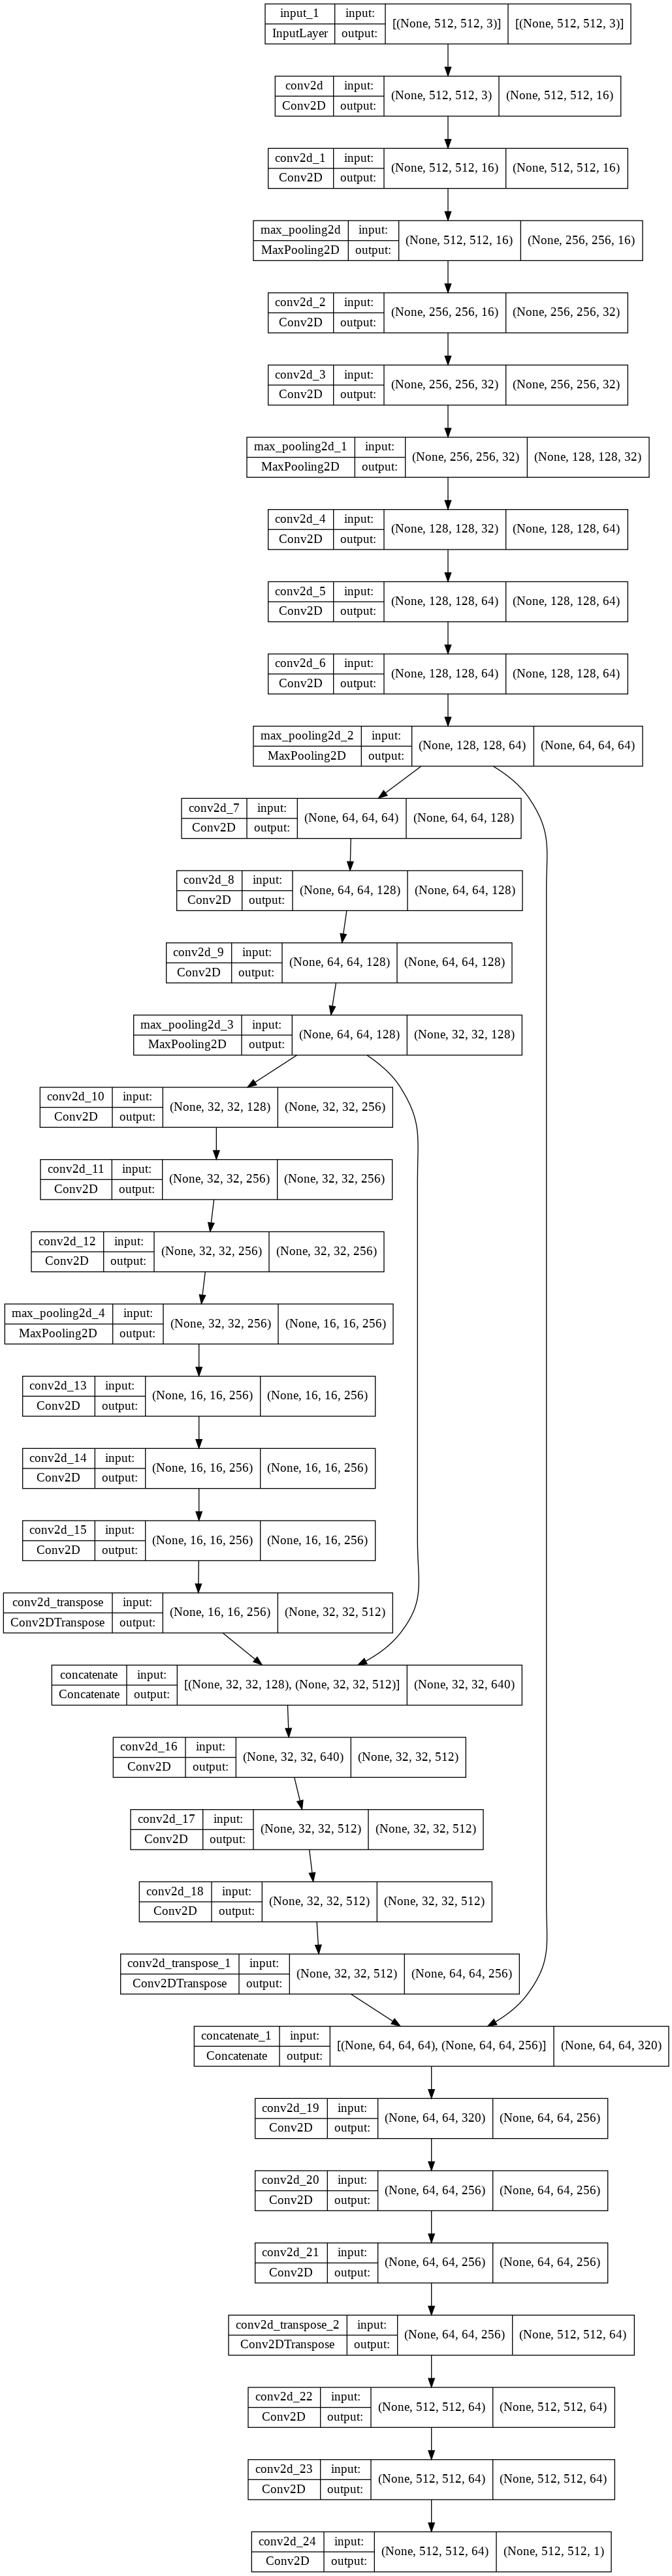

In [ ]:
#Visualize the created model
plot_model(fcn_8s_model, show_shapes = True, to_file = 'FCN_8s_Model.png')

In [ ]:
#Train the model on the training data and save the trained model
fcn_8s_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, batch_size = 4)
fcn_8s_model.save('FCN_8s_Weights')

Epoch 1/10
35/35 [==============================] - 922s 26s/step - loss: 0.7745 - val_loss: 0.8037
Epoch 2/10
35/35 [==============================] - 911s 26s/step - loss: 0.7686 - val_loss: 0.8037
Epoch 3/10
35/35 [==============================] - 913s 26s/step - loss: 0.7683 - val_loss: 0.8037
Epoch 4/10
35/35 [==============================] - 903s 26s/step - loss: 0.7681 - val_loss: 0.8037
Epoch 5/10
35/35 [==============================] - 900s 26s/step - loss: 0.7682 - val_loss: 0.8037
Epoch 6/10
35/35 [==============================] - 899s 26s/step - loss: 0.7683 - val_loss: 0.8037
Epoch 7/10
35/35 [==============================] - 904s 26s/step - loss: 0.7684 - val_loss: 0.8037
Epoch 8/10
35/35 [==============================] - 902s 26s/step - loss: 0.7681 - val_loss: 0.8037
Epoch 9/10
35/35 [==============================] - 904s 26s/step - loss: 0.7684 - val_loss: 0.8037
Epoch 10/10
35/35 [==============================] - 903s 26s/step - loss: 0.7681 - val_loss: 0.8037

In [ ]:
#Evaluate the performance of the model on the test data
fcn_8s_model.evaluate(X_test, y_test)

1/1 [==============================] - 23s 23s/step - loss: 0.6864


0.6863625645637512

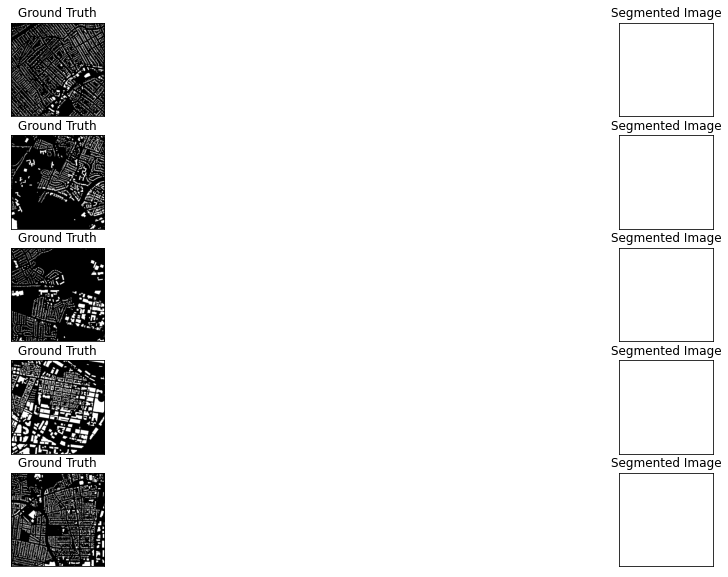

In [ ]:
#Visualize the performance of the model by plotting the predictions
plt.figure(figsize = (20, 10))
test_output = []
for count in range(5):
  curr_input = X_test[count]
  curr_input = np.expand_dims(curr_input, axis = 0)
  curr_prediction = fcn_8s_model.predict(curr_input)
  plt.subplot(5, 2, (count * 2) + 1)
  ground_truth = y_test[count] 
  ground_truth = np.reshape(ground_truth, (512, 512))
  plt.imshow(ground_truth, cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.title('Ground Truth')
  plt.subplot(5, 2, count * 2 + 2)
  curr_prediction = np.reshape(curr_prediction, (512, 512))
  curr_prediction = np.where(curr_prediction >= 0.5, 1., 0.)
  plt.imshow(curr_prediction, cmap = 'gray', vmin = 0, vmax = 1)
  plt.xticks([])
  plt.yticks([])
  plt.title('Segmented Image')
  if (count == 4):
    test_output = curr_prediction
plt.show()

In [24]:
#Redefining the FCN-8s model (Changed architecture, learning rate and initialized weights)

input_layer = Input(shape = (512, 512, 3))
encoder_conv_layer_1a = Conv2D(filters = 8, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(input_layer)
encoder_conv_layer_1b = Conv2D(filters = 8, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_conv_layer_1a)

encoder_pool_layer_2 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(encoder_conv_layer_1b)
encoder_conv_layer_2a = Conv2D(filters = 16, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_pool_layer_2)
encoder_conv_layer_2b = Conv2D(filters = 16, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_conv_layer_2a)

encoder_pool_layer_3 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(encoder_conv_layer_2b)
encoder_conv_layer_3a = Conv2D(filters = 32, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_pool_layer_3)
encoder_conv_layer_3b = Conv2D(filters = 32, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_conv_layer_3a)
encoder_conv_layer_3c = Conv2D(filters = 32, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_conv_layer_3b)

encoder_pool_layer_4 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(encoder_conv_layer_3c)
encoder_conv_layer_4a = Conv2D(filters = 64, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_pool_layer_4)
encoder_conv_layer_4b = Conv2D(filters = 64, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_conv_layer_4a)
encoder_conv_layer_4c = Conv2D(filters = 64, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_conv_layer_4b)

encoder_pool_layer_5 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(encoder_conv_layer_4c)
encoder_conv_layer_5a = Conv2D(filters = 64, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_pool_layer_5)
encoder_conv_layer_5b = Conv2D(filters = 64, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_conv_layer_5a)
encoder_conv_layer_5c = Conv2D(filters = 64, kernel_size = (3, 3), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_conv_layer_5b)

encoder_pool_layer_6 = MaxPooling2D(pool_size = (2, 2), strides = (2, 2))(encoder_conv_layer_5c)
encoder_conv_11_layer_6 = Conv2D(filters = 1, kernel_size = (1, 1), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_pool_layer_6)

decoder_deconv_input_layer_5 = Conv2DTranspose(filters = 1, kernel_size = (2, 2), strides = (2, 2), padding = 'same', activation = 'relu')(encoder_conv_11_layer_6)
skip_conn_input_layer_5 = Conv2D(filters = 1, kernel_size = (1, 1), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_pool_layer_5)
skip_conn_output_layer_5 = add([decoder_deconv_input_layer_5, skip_conn_input_layer_5])

decoder_deconv_input_layer_4 = Conv2DTranspose(filters = 1, kernel_size = (2, 2), strides = (2, 2), padding = 'same', activation = 'relu')(skip_conn_output_layer_5)
skip_conn_input_layer_4 = Conv2D(filters = 1, kernel_size = (1, 1), kernel_initializer = 'he_normal', padding = 'same', activation = 'relu')(encoder_pool_layer_4)
skip_conn_output_layer_4 = add([decoder_deconv_input_layer_4, skip_conn_input_layer_4])

output_layer = Conv2DTranspose(filters = 1, kernel_size = (8, 8), strides = (8, 8), padding = 'same', activation = 'sigmoid')(skip_conn_output_layer_4)

fcn_8s_modified_model = Model(inputs = input_layer, outputs = output_layer)
fcn_8s_modified_model.compile(optimizer = Adam(learning_rate = 0.01), loss = dice_loss)
fcn_8s_modified_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_93 (Conv2D)             (None, 512, 512, 8)  224         ['input_8[0][0]']                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 512, 512, 8)  584         ['conv2d_93[0][0]']              
                                                                                                  
 max_pooling2d_32 (MaxPooling2D  (None, 256, 256, 8)  0          ['conv2d_94[0][0]']        

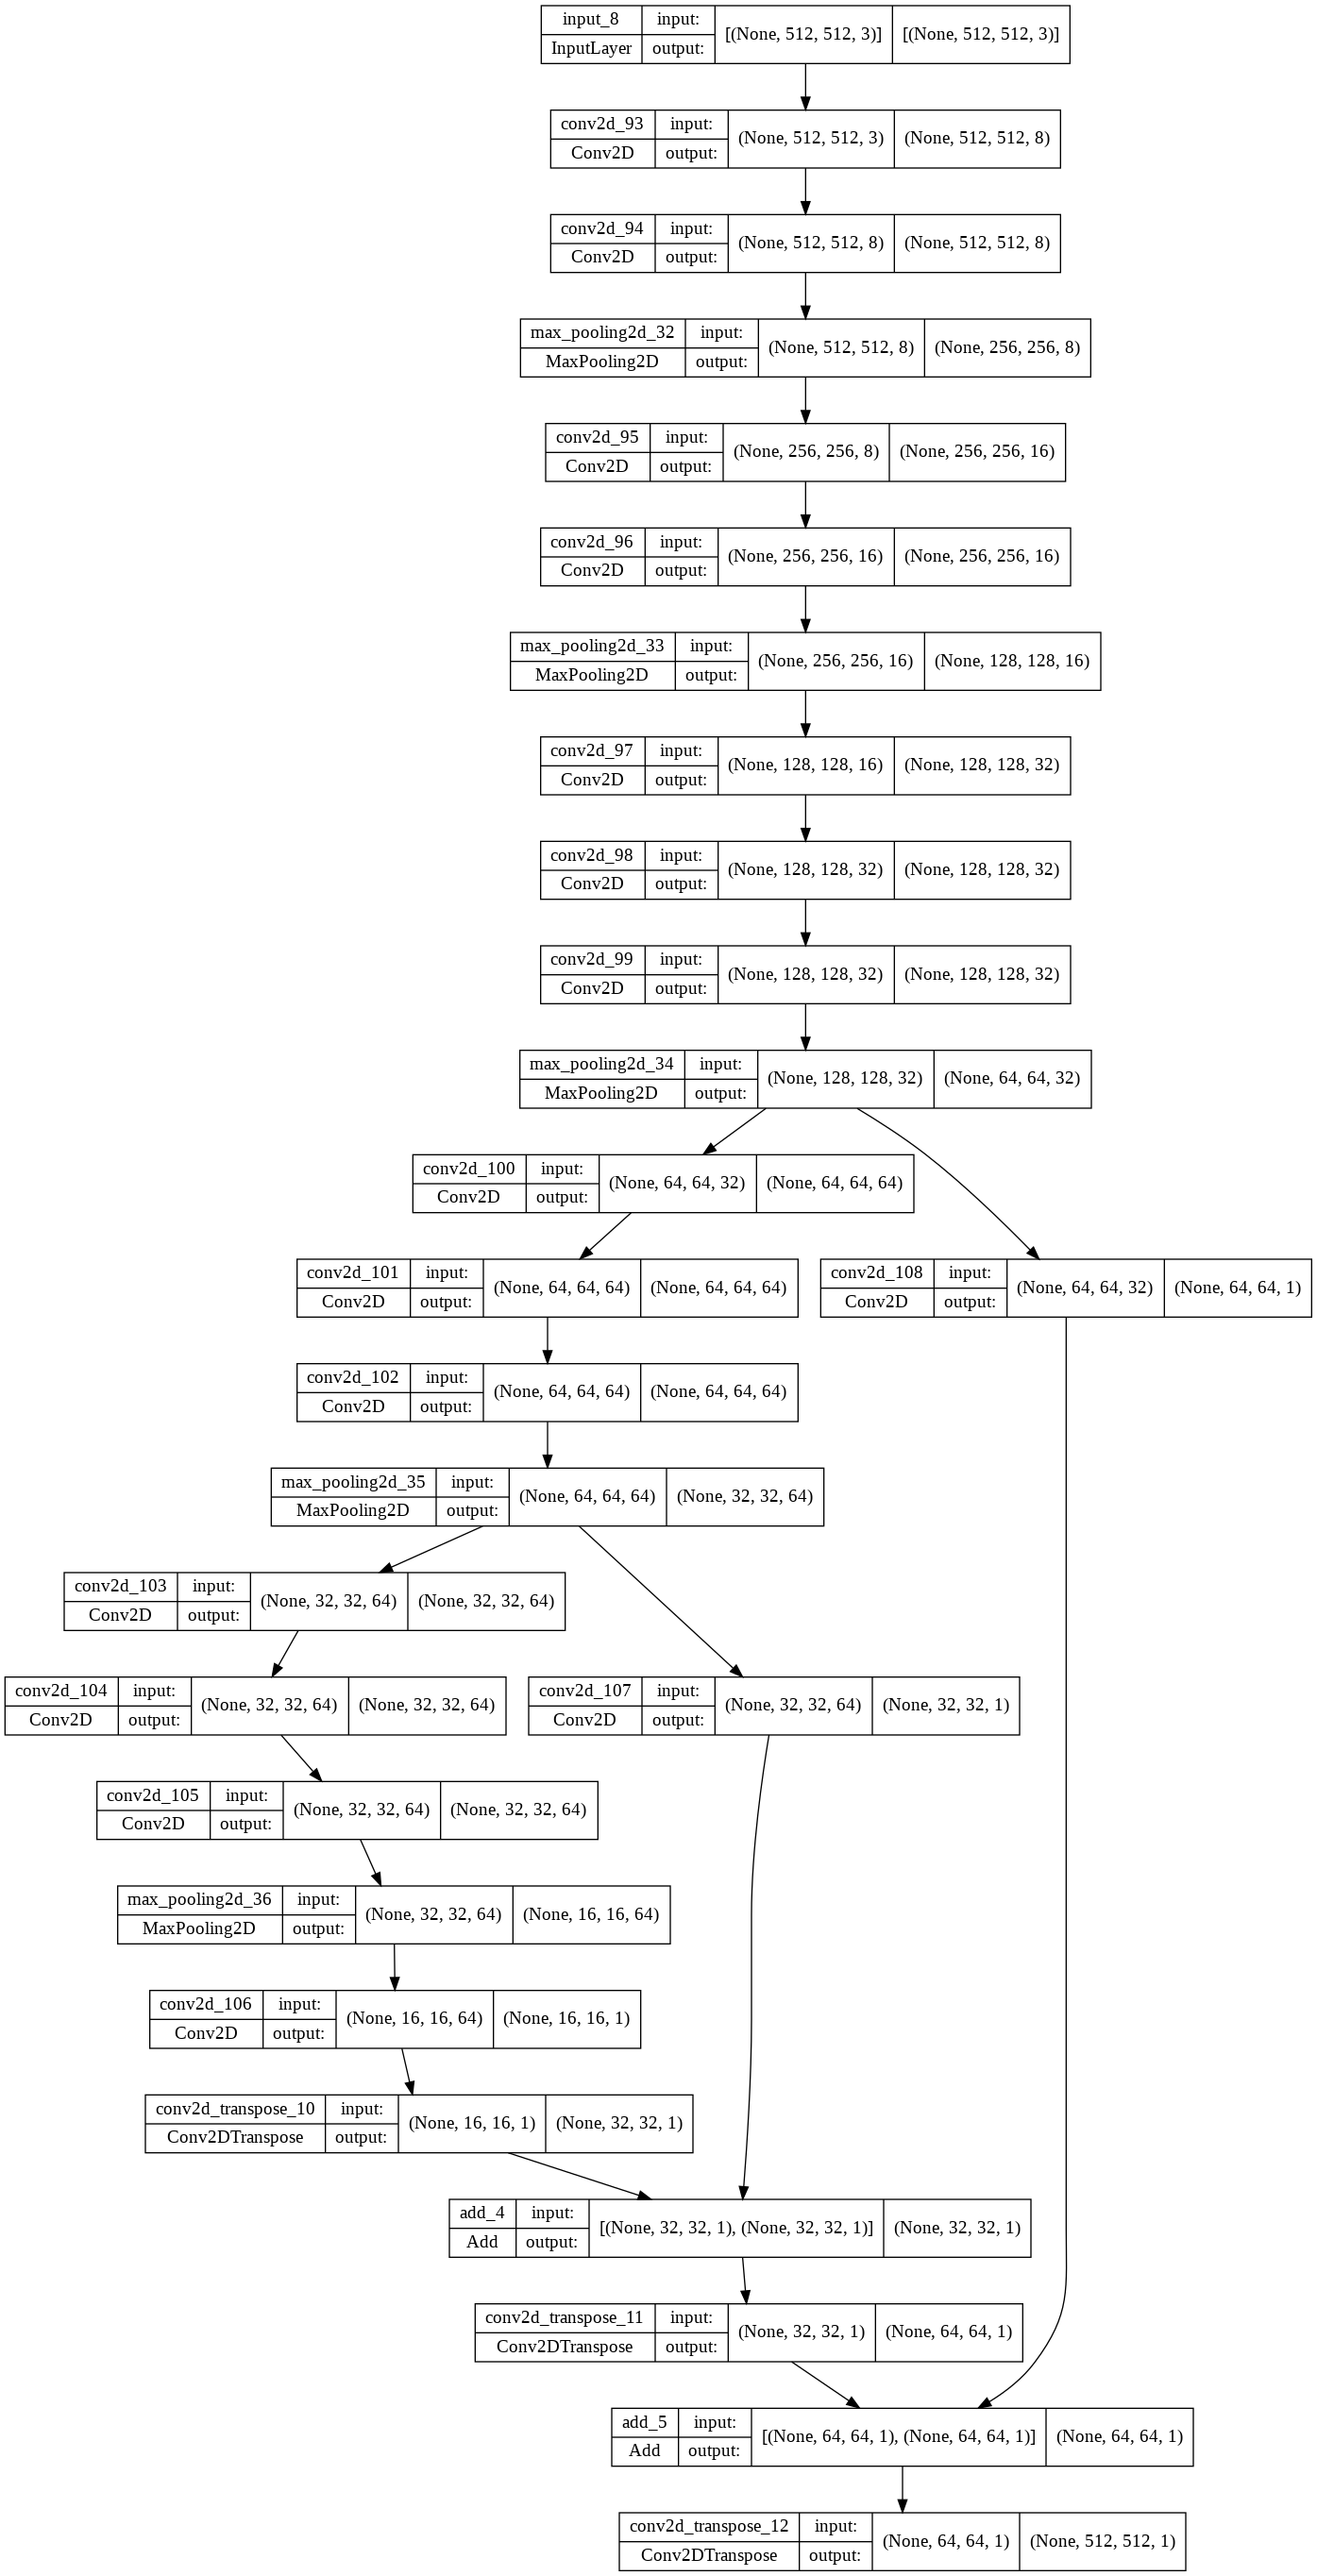

In [25]:
#Visualize the created model
plot_model(fcn_8s_modified_model, show_shapes = True, to_file = 'FCN_8s_Model_Modified.png')

In [26]:
#Train the model on the training data and save the trained model
fcn_8s_modified_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, batch_size = 4)
fcn_8s_modified_model.save('FCN_8s__Modified_Weights')

Epoch 1/10
35/35 [==============================] - 42s 1s/step - loss: 0.7605 - val_loss: 0.7733
Epoch 2/10
35/35 [==============================] - 43s 1s/step - loss: 0.7333 - val_loss: 0.7696
Epoch 3/10
35/35 [==============================] - 43s 1s/step - loss: 0.7294 - val_loss: 0.7473
Epoch 4/10
35/35 [==============================] - 45s 1s/step - loss: 0.7114 - val_loss: 0.7283
Epoch 5/10
35/35 [==============================] - 41s 1s/step - loss: 0.6995 - val_loss: 0.7123
Epoch 6/10
35/35 [==============================] - 42s 1s/step - loss: 0.6824 - val_loss: 0.7035
Epoch 7/10
35/35 [==============================] - 41s 1s/step - loss: 0.6810 - val_loss: 0.6985
Epoch 8/10
35/35 [==============================] - 41s 1s/step - loss: 0.6678 - val_loss: 0.6786
Epoch 9/10
35/35 [==============================] - 42s 1s/step - loss: 0.6594 - val_loss: 0.6686
Epoch 10/10
35/35 [==============================] - 41s 1s/step - loss: 0.6642 - val_loss: 0.6679


In [28]:
#Evaluate the performance of the model on the test data
fcn_8s_modified_model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 936ms/step - loss: 0.5845


0.584524393081665

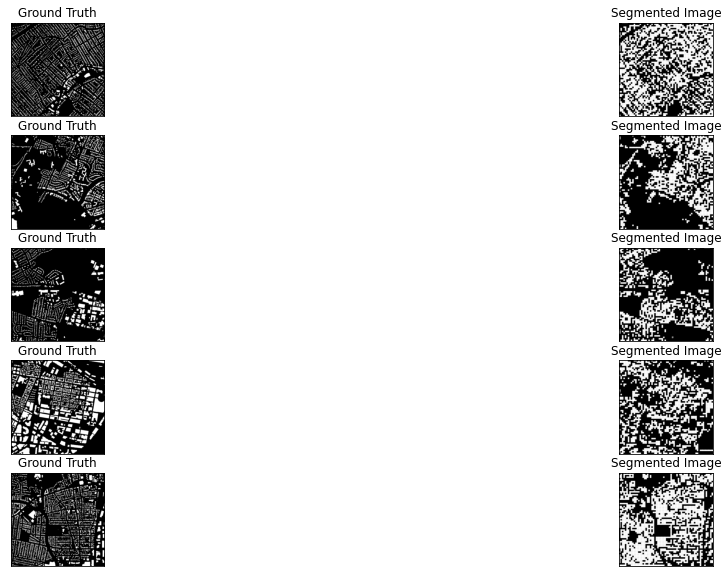

In [30]:
#Visualize the performance of the model by plotting the predictions
plt.figure(figsize = (20, 10))
test_output = []
for count in range(5):
  curr_input = X_test[count]
  curr_input = np.expand_dims(curr_input, axis = 0)
  curr_prediction = fcn_8s_modified_model.predict(curr_input)
  plt.subplot(5, 2, (count * 2) + 1)
  ground_truth = y_test[count] 
  ground_truth = np.reshape(ground_truth, (512, 512))
  plt.imshow(ground_truth, cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.title('Ground Truth')
  plt.subplot(5, 2, count * 2 + 2)
  curr_prediction = np.reshape(curr_prediction, (512, 512))
  curr_prediction = np.where(curr_prediction >= 0.5, 1., 0.)
  plt.imshow(curr_prediction, cmap = 'gray', vmin = 0, vmax = 1)
  plt.xticks([])
  plt.yticks([])
  plt.title('Segmented Image')
  if (count == 4):
    test_output = curr_prediction
plt.show()